In [3]:
def step_function():
    if x > 0:
        return 1
    else:
        return 0

上記だとnumpyを受け付けないため変更

In [10]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])

In [11]:
x

array([-1.,  1.,  2.])

In [12]:
y = x > 0

In [13]:
y

array([False,  True,  True])

In [14]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [15]:
step_function(x)

<ipython-input-14-47f5bcf60462>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int)


array([0, 1, 1])

In [16]:
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

<ipython-input-16-226172c0ab45>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype=np.int)


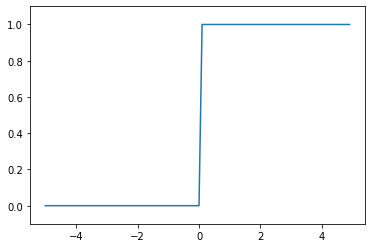

In [17]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [18]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [19]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

numpyのブロードキャスト

In [20]:
t = np.array([1.0, 2.0, 3.0])

In [21]:
1.0 + t

array([2., 3., 4.])

In [22]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

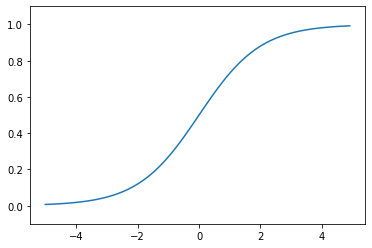

In [23]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [24]:
def relu(x):
    return np.maximum(0, x)
    # np.max, np.maxmimは違う
    # このnp.maximumの0もブロードキャスト

In [25]:
x = np.array([1, -2, 3])
relu(x)

array([1, 0, 3])

In [26]:
np.max(0, x)

TypeError: only integer scalar arrays can be converted to a scalar index

In [27]:
x1 = np.array([1, -2, 3])
x2 = np.array([0, 3, 1])
np.maximum(x1, x2)

array([1, 3, 3])

In [28]:
# 1層目
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

In [29]:
A1 = np.dot(X, W1) + B1
print(A1)

[0.3 0.7 1.1]


In [30]:
Z1 = sigmoid(A1)
print(Z1)

[0.57444252 0.66818777 0.75026011]


In [31]:
# 2層目
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2)

[0.62624937 0.7710107 ]


In [32]:
def identity_function(x):
    return x

# 3層目
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)


[0.31682708 0.69627909]


In [33]:
# 重みとバイアスの初期化
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

# 入力信号が出力へと変換されるプロセス
def forward(network, x):
    network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

In [34]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)

In [35]:
print(y)

[0.31682708 0.69627909]


In [36]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [37]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [38]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [39]:
# オーバーフローを考慮してないソフトマックス関数
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [40]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

<ipython-input-40-23103c906500>:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
<ipython-input-40-23103c906500>:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [41]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [42]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [43]:
# オーバーフローを考慮したソフトマックス関数
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [44]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [45]:
# ソフトマックスの総和は1
np.sum(y)

1.0